In [1]:
import os, sys
sys.path.append('../')
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from utils import acc_plot, loss_plot

In [2]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

2023-03-09 12:56:50.159278: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 12:56:50.265172: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in X_train[0]]) # 0, 1, 2 - symbolizes sth

In [4]:
decoded_review[:30]

'? this film was just brilliant'

In [5]:
len(X_train[1]), len(X_train[0]) # rozne dlugosci!

(189, 218)

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [7]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [8]:
X_train.shape

(25000, 10000)

In [9]:
y_test = np.float32(y_test)
y_train = y_train.astype('float32')

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)), # (10000,) because it is (10000, any batch_size)
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

2023-03-09 12:56:54.173793: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-09 12:56:54.173818: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: kk21
2023-03-09 12:56:54.173822: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: kk21
2023-03-09 12:56:54.173947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.86.1
2023-03-09 12:56:54.173960: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.86.1
2023-03-09 12:56:54.173962: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.86.1
2023-03-09 12:56:54.174161: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neu

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
from keras import losses, metrics, optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [15]:
X_val = X_train[:10000]
X_train = X_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]

In [16]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5251 - binary_accuracy: 0.7821 - val_loss: 0.3871 - val_binary_accuracy: 0.8680
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3114 - binary_accuracy: 0.8963 - val_loss: 0.3305 - val_binary_accuracy: 0.8643
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2274 - binary_accuracy: 0.9234 - val_loss: 0.2790 - val_binary_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1782 - binary_accuracy: 0.9421 - val_loss: 0.3014 - val_binary_accuracy: 0.8776
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1420 - binary_accuracy: 0.9545 - val_loss: 0.2977 - val_binary_accuracy: 0.8819
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1207 - binary_accuracy: 0.9609 - val_loss: 0.2909 - val_binary_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

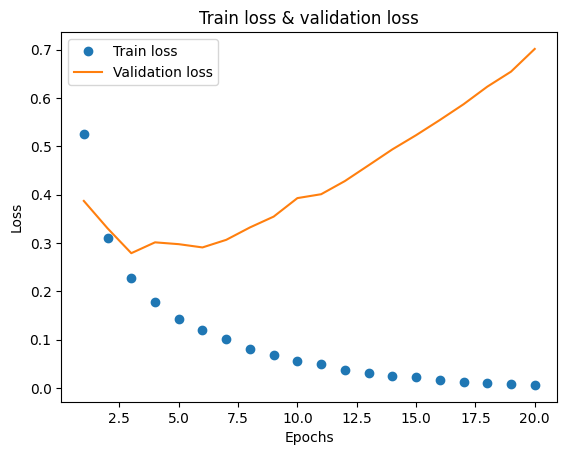

In [18]:
loss_plot(history_dict)

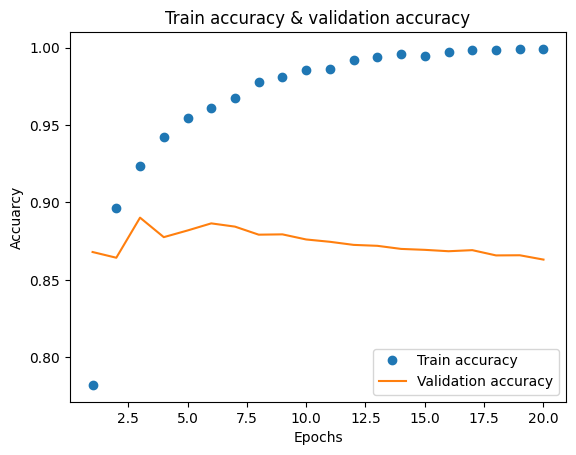

In [19]:
acc_plot(history_dict)

<b>Overfitting! It would be necessary to re-train the model on only 4 epochs.</b>

In [20]:
model.predict(X_test)

782/782 [==============================] - 0s 519us/step


array([[4.2510512e-03],
       [9.9999994e-01],
       [6.6883624e-01],
       ...,
       [9.4557082e-04],
       [9.1956193e-03],
       [6.9009632e-01]], dtype=float32)

# Methods to fight overfitting
- More data
- Less parameters in network
- Regularization
- Dropout

In [21]:
from keras import regularizers
lambda_coef = 0.001

In [22]:
l2_model = Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(lambda_coef), activation='relu', input_shape=(10000,)),
    Dense(16, kernel_regularizer=regularizers.l2(lambda_coef), activation='relu'),
    Dense(1, activation='sigmoid')
])

Epoch 1/10
30/30 [==============================] - 1s 18ms/step - loss: 0.5919 - accuracy: 0.7607 - val_loss: 0.4629 - val_accuracy: 0.8691
Epoch 2/10
30/30 [==============================] - 0s 8ms/step - loss: 0.3909 - accuracy: 0.8935 - val_loss: 0.4247 - val_accuracy: 0.8388
Epoch 3/10
30/30 [==============================] - 0s 8ms/step - loss: 0.3129 - accuracy: 0.9154 - val_loss: 0.3542 - val_accuracy: 0.8795
Epoch 4/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2767 - accuracy: 0.9275 - val_loss: 0.3329 - val_accuracy: 0.8899
Epoch 5/10
30/30 [==============================] - 0s 8ms/step - loss: 0.2478 - accuracy: 0.9348 - val_loss: 0.3314 - val_accuracy: 0.8881
Epoch 6/10
30/30 [==============================] - 0s 8ms/step - loss: 0.2319 - accuracy: 0.9433 - val_loss: 0.3366 - val_accuracy: 0.8867
Epoch 7/10
30/30 [==============================] - 0s 9ms/step - loss: 0.2143 - accuracy: 0.9496 - val_loss: 0.3379 - val_accuracy: 0.8866
Epoch 8/10
30/30 [=

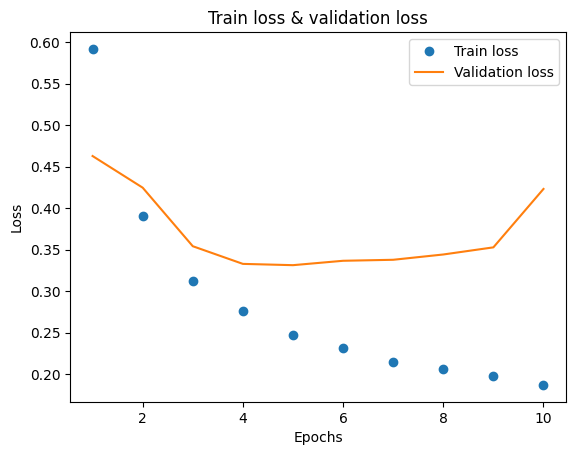

In [23]:
l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = l2_model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))

loss_plot(history.history,epochs=10)

Epoch 1/10
30/30 [==============================] - 1s 22ms/step - loss: 1.1568 - accuracy: 0.7329 - val_loss: 0.7365 - val_accuracy: 0.7885
Epoch 2/10
30/30 [==============================] - 0s 10ms/step - loss: 0.6637 - accuracy: 0.8453 - val_loss: 0.6491 - val_accuracy: 0.8429
Epoch 3/10
30/30 [==============================] - 0s 8ms/step - loss: 0.6232 - accuracy: 0.8463 - val_loss: 0.6440 - val_accuracy: 0.8290
Epoch 4/10
30/30 [==============================] - 0s 8ms/step - loss: 0.5943 - accuracy: 0.8570 - val_loss: 0.6188 - val_accuracy: 0.8418
Epoch 5/10
30/30 [==============================] - 0s 8ms/step - loss: 0.5825 - accuracy: 0.8573 - val_loss: 0.5919 - val_accuracy: 0.8538
Epoch 6/10
30/30 [==============================] - 0s 8ms/step - loss: 0.5714 - accuracy: 0.8621 - val_loss: 0.6090 - val_accuracy: 0.8392
Epoch 7/10
30/30 [==============================] - 0s 10ms/step - loss: 0.5607 - accuracy: 0.8649 - val_loss: 0.5846 - val_accuracy: 0.8539
Epoch 8/10
30/30 

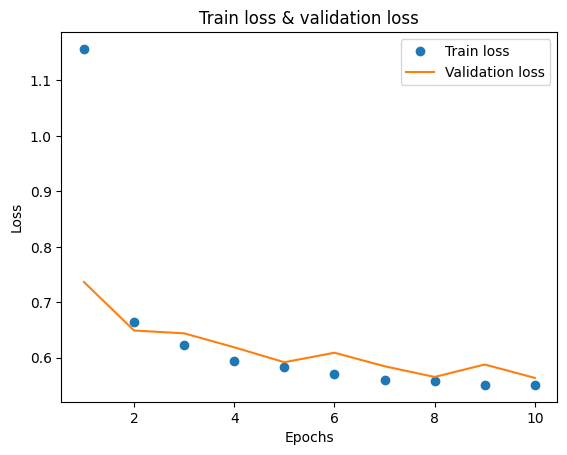

In [24]:
l1_model = Sequential([
    Dense(16, kernel_regularizer=regularizers.l1(lambda_coef), activation='relu', input_shape=(10000,)),
    Dense(16, kernel_regularizer=regularizers.l1(lambda_coef), activation='relu'),
    Dense(1, activation='sigmoid')
])
l1_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = l1_model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))

loss_plot(history.history,epochs=10)

Epoch 1/10
30/30 [==============================] - 1s 18ms/step - loss: 1.1661 - accuracy: 0.7309 - val_loss: 0.7389 - val_accuracy: 0.8314
Epoch 2/10
30/30 [==============================] - 0s 9ms/step - loss: 0.6870 - accuracy: 0.8426 - val_loss: 0.6870 - val_accuracy: 0.8173
Epoch 3/10
30/30 [==============================] - 0s 8ms/step - loss: 0.6348 - accuracy: 0.8501 - val_loss: 0.6444 - val_accuracy: 0.8362
Epoch 4/10
30/30 [==============================] - 0s 8ms/step - loss: 0.6034 - accuracy: 0.8548 - val_loss: 0.5988 - val_accuracy: 0.8592
Epoch 5/10
30/30 [==============================] - 0s 9ms/step - loss: 0.5821 - accuracy: 0.8633 - val_loss: 0.5886 - val_accuracy: 0.8575
Epoch 6/10
30/30 [==============================] - 0s 9ms/step - loss: 0.5715 - accuracy: 0.8617 - val_loss: 0.5677 - val_accuracy: 0.8628
Epoch 7/10
30/30 [==============================] - 0s 8ms/step - loss: 0.5560 - accuracy: 0.8665 - val_loss: 0.5698 - val_accuracy: 0.8609
Epoch 8/10
30/30 [=

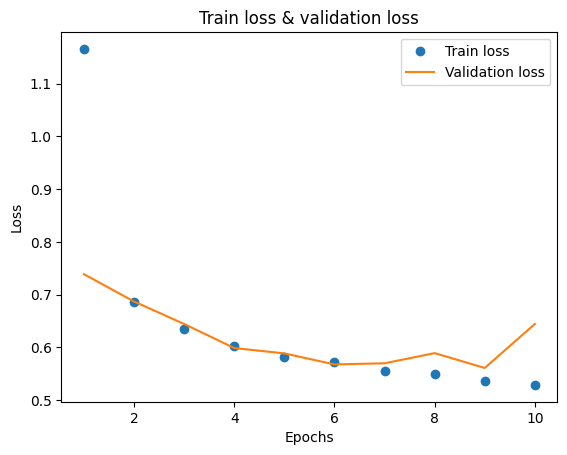

In [25]:
l1l2_model = Sequential([
    Dense(16, kernel_regularizer=regularizers.l1_l2(l1=lambda_coef, l2=lambda_coef), activation='relu', input_shape=(10000,)),
    Dense(16, kernel_regularizer=regularizers.l1_l2(l1=lambda_coef, l2=lambda_coef), activation='relu'),
    Dense(1, activation='sigmoid')
])
l1l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = l1l2_model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))

loss_plot(history.history,epochs=10)

Epoch 1/10
30/30 [==============================] - 1s 20ms/step - loss: 0.5542 - accuracy: 0.8691 - val_loss: 0.5330 - val_accuracy: 0.8594
Epoch 2/10
30/30 [==============================] - 0s 8ms/step - loss: 0.5216 - accuracy: 0.8730 - val_loss: 0.5144 - val_accuracy: 0.8704
Epoch 3/10
30/30 [==============================] - 0s 8ms/step - loss: 0.5079 - accuracy: 0.8801 - val_loss: 0.5854 - val_accuracy: 0.8258
Epoch 4/10
30/30 [==============================] - 0s 8ms/step - loss: 0.5159 - accuracy: 0.8727 - val_loss: 0.5322 - val_accuracy: 0.8571
Epoch 5/10
30/30 [==============================] - 0s 8ms/step - loss: 0.5072 - accuracy: 0.8790 - val_loss: 0.5196 - val_accuracy: 0.8686
Epoch 6/10
30/30 [==============================] - 0s 10ms/step - loss: 0.5035 - accuracy: 0.8768 - val_loss: 0.5449 - val_accuracy: 0.8490
Epoch 7/10
30/30 [==============================] - 0s 8ms/step - loss: 0.4961 - accuracy: 0.8818 - val_loss: 0.5045 - val_accuracy: 0.8732
Epoch 8/10
30/30 [

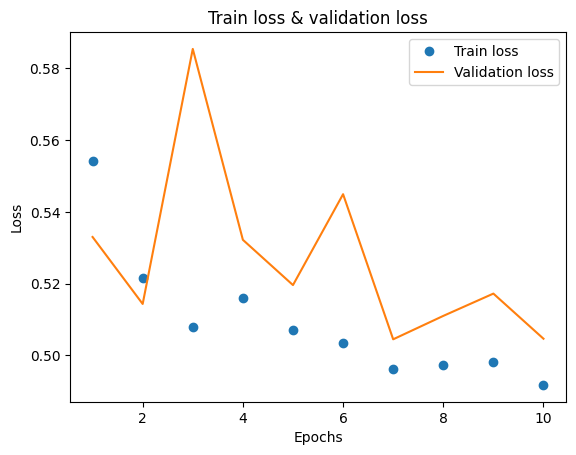

In [26]:
from keras.layers import Dropout
dpt_model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
l1l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = l1l2_model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))

loss_plot(history.history,epochs=10)